In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sn

In [48]:
df = pd.read_csv('alpha.csv')
display(df.T)

np.set_printoptions(edgeitems = 200, linewidth = 150)
# df.values

,0,1,2,3,4,5,6,7,8,9,...,5360637,5360638,5360639,5360640,5360641,5360642,5360643,5360644,5360645,5360646
is_winner,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,1.000000
hand_size,12.000000,13.000000,11.000000,11.0,11.0,13.000000,10.000000,14.000000,10.000000,13.0,...,19.000000,4.000000,11.000000,11.0,18.000000,3.000000,12.000000,8.000000,15.0,0.000000
pile_size,2.000000,2.000000,4.000000,5.0,2.0,2.000000,2.000000,3.000000,2.000000,3.0,...,5.000000,5.000000,6.000000,2.0,2.000000,2.000000,5.000000,9.000000,13.0,17.000000
num_hand_ranks,10.000000,8.000000,8.000000,9.0,9.0,8.000000,7.000000,8.000000,8.000000,7.0,...,5.000000,1.000000,3.000000,3.0,5.000000,1.000000,3.000000,2.000000,4.0,0.000000
num_possible_pile_ranks,2.000000,2.000000,3.000000,4.0,2.0,2.000000,2.000000,3.000000,2.000000,3.0,...,2.000000,2.000000,3.000000,2.0,2.000000,2.000000,2.000000,3.000000,4.0,5.000000
min_turns_min_bluffs,11.000000,9.000000,8.000000,9.0,10.0,8.000000,7.000000,8.000000,9.000000,8.0,...,8.000000,2.000000,6.000000,6.0,7.000000,1.000000,6.000000,5.000000,7.0,0.000000
min_other_player_hand_size,12.000000,12.000000,12.000000,11.0,11.0,11.000000,11.000000,10.000000,12.000000,10.0,...,8.000000,12.000000,4.000000,4.0,4.000000,12.000000,4.000000,4.000000,4.0,8.000000
avg_other_player_hand_size,12.666667,12.333333,12.333333,12.0,13.0,12.333333,13.333333,11.666667,13.333333,12.0,...,9.333333,14.333333,11.666667,13.0,10.666667,15.666667,11.666667,11.666667,8.0,11.666667
prod_other_player_hand_size,2028.000000,1872.000000,1872.000000,1716.0,2145.0,1815.000000,2310.000000,1540.000000,2352.000000,1680.0,...,768.000000,2736.000000,912.000000,1216.0,768.000000,3648.000000,912.000000,912.000000,384.0,1440.000000


In [50]:
features = ["hand_size","pile_size","num_hand_ranks","num_possible_pile_ranks","min_turns_min_bluffs","min_other_player_hand_size","avg_other_player_hand_size","prod_other_player_hand_size"]

In [52]:
# features for regression input
f =  features
# feature for regression output
g = "is_winner"

# feature for dependent plot
var = "prod_other_player_hand_size"


print("\n".join(f"**{el}**" if el == var else el for el in f))
print("-------")
print(g)

hand_size
pile_size
num_hand_ranks
num_possible_pile_ranks
min_turns_min_bluffs
min_other_player_hand_size
avg_other_player_hand_size
**prod_other_player_hand_size**
-------
is_winner


CSV LINE:

0.2503968363,0.0000715776,-0.0000357845,0.0001719485,0.0002022753,-0.0003620922,0.0000256869,-0.0000119310,-0.0000000969 


R^2:   7.088655545883782e-07 




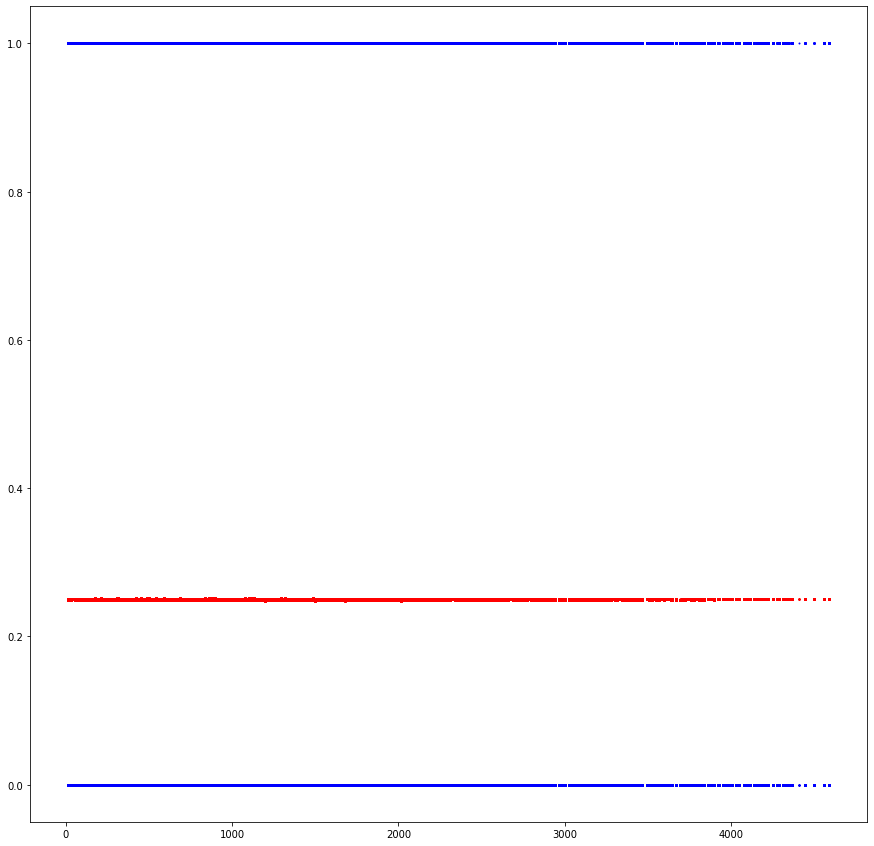

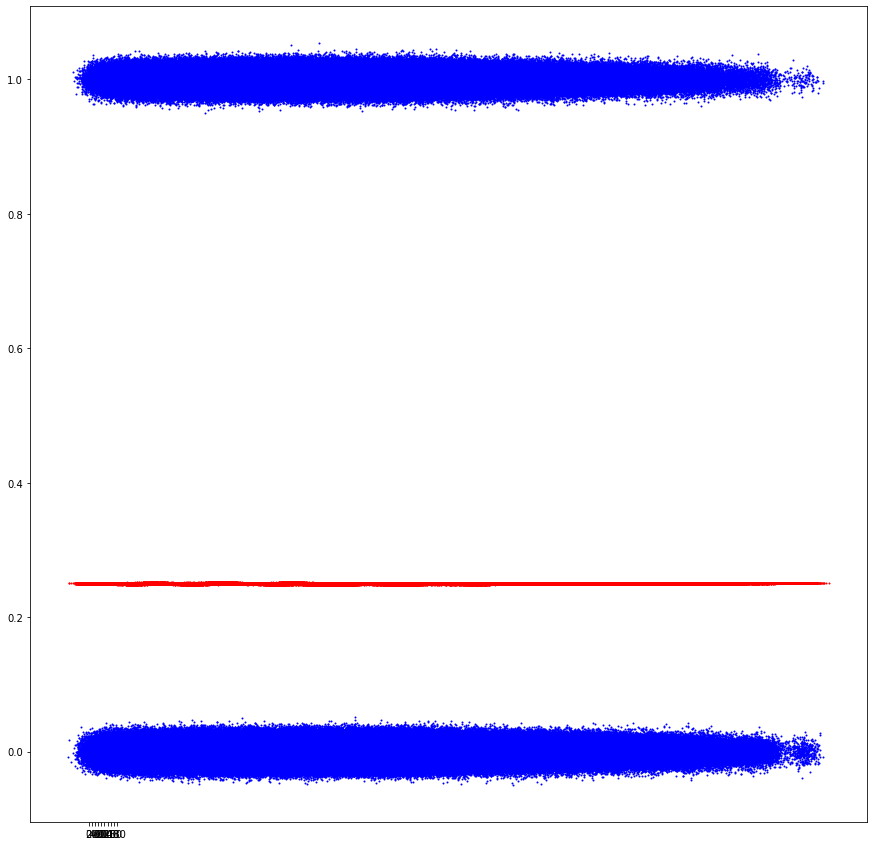

In [53]:
X = df[f]
y = df[[g]]

linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

print("CSV LINE:\n")
line =  '{0:.10f}'.format(linear_regressor.intercept_[0])
for i in range(len(features)):
    if features[i] in f:
        line += ',' + '{0:.10f}'.format(linear_regressor.coef_[0][f.index(features[i])])
    else:
        line += ",0"
print(line, "\n\n")

print("R^2:  ", linear_regressor.score(X, y), "\n\n")

y_pred = linear_regressor.predict(X)


fig = plt.figure(figsize=(15,15))
plt.scatter(X[[var]], y[[g]], s=1, color='blue')
plt.scatter(X[[var]], y_pred.T[0], s=1, color='red')
plt.show()


def jitter(arr):
    stdev = 0.01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

fig = plt.figure(figsize=(15,15))
plt.xticks(range(0,200,20))
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y[[g]].values.T[0]), s=1, color='blue')
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y_pred.T[0]), s=1, color='red')
plt.show()